In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import nelpy as nel

/mnt/d/Development/Python/nelpy/nelpy/plotting/decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
MasterTime = []
EncoderData = [] 
LickData = [] 
with open('shorterlog.txt', newline='') as csvfile:  
    reader = csv.reader(csvfile, delimiter=',')  
    for row in reader:  
        EncoderData.append(int(row[3])) # Append the (wrapped) Encoder data 
        LickData.append(int(row[1]))
        MasterTime.append(int(row[0]))
MasterTime = np.array(MasterTime)

In [3]:
wrapped_pos = (np.array(EncoderData)/4096*20.2*np.pi) % 150.0

In [4]:
LickPulses = np.array(LickData) & 1

In [5]:
LickRising = MasterTime[np.argwhere(np.diff(LickPulses,1,axis=0)==1)]
LickFalling = MasterTime[np.argwhere(np.diff(LickPulses,1,axis=0)==-1)]

In [6]:
LickEpochs = nel.EpochArray(np.hstack((LickRising, LickFalling)))

In [7]:
InterLickIntervals = np.diff(LickEpochs.starts)

Text(0.5, 1.0, 'Distribution of Lick Durations')

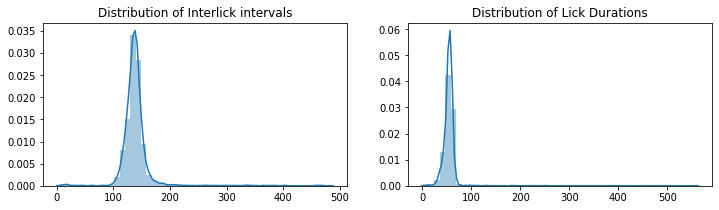

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
sns.distplot(InterLickIntervals[InterLickIntervals< 500], ax=ax[0])
ax[0].set_title('Distribution of Interlick intervals')

sns.distplot(LickEpochs.lengths, ax=ax[1])
ax[1].set_title('Distribution of Lick Durations')


In [12]:
LickEpochs.lengths.max()

560